# YOLO Training Configuration Parameters

This document explains the additional parameters used in the YOLO training process. These parameters allow for customization and optimization of the training pipeline.

## Parameters Explanation

### `batch=16`
- **Description**: Sets the batch size for training.
- **Impact**: Higher values may improve training speed but require more GPU memory.

### `device=0`
- **Description**: Specifies the GPU ID to use for training.
- **Options**: 
  - Use `0`, `1`, etc., for specific GPU IDs.
  - Use `'cpu'` if no GPU is available.

### `lr0=0.01`
- **Description**: Sets the initial learning rate for the optimizer.
- **Impact**: Affects how quickly the model weights are updated during training.

### `optimizer='Adam'`
- **Description**: Chooses the optimizer for training.
- **Options**:
  - `'Adam'` for Adam optimizer.
  - `'SGD'` for Stochastic Gradient Descent.

### `workers=8`
- **Description**: Specifies the number of worker threads for data loading.
- **Impact**: Higher values can improve data loading speeds but may require more system resources.

### `seed=42`
- **Description**: Ensures reproducibility by setting a random seed.
- **Impact**: Makes training results consistent across different runs.

### `patience=10`
- **Description**: Implements early stopping if validation metrics do not improve for the specified number of epochs.
- **Impact**: Prevents overfitting and saves training time.

### `weight_decay=0.0005`
- **Description**: Applies weight decay for regularization.
- **Impact**: Reduces overfitting by penalizing large weights.

### `momentum=0.937`
- **Description**: Momentum parameter for optimizers like SGD.
- **Impact**: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

### `name='exp_name'`
- **Description**: Names the experiment and creates a folder in the `runs/train` directory.
- **Impact**: Helps organize and identify training experiments.

### `verbose=True`
- **Description**: Outputs detailed logs during training.
- **Impact**: Provides more visibility into the training process.

---

## Example Usage

```python
results = model.train(
    data="data.yaml",   # Path to dataset YAML file
    epochs=100,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=16,           # Batch size
    device=0,           # GPU ID or 'cpu'
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer type
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience
    weight_decay=0.0005,  # Weight decay
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Experiment name
    verbose=True        # Detailed logs
)


https://universe.roboflow.com/workenv-dayet/facial-emotion-dataset-7g1jd-hipbk

**Step 01 # Install the Ultralytics Package**

In [1]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install ultralytics
!pip install roboflow

# Clean up the notebook
clean_notebook()




Notebook cleaned.


**Step 02 # Import All the Requried Libraries**

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
Setup complete ✅ (256 CPUs, 2015.7 GB RAM, 265.9/3519.1 GB disk)


**Step # 03 Download Dataset from Roboflow**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
dataset.location

'/workspace/code/test/yolo11/Facial-Emotion-Dataset--3'

In [5]:

from ultralytics import YOLO
from IPython.display import Image

# Load the YOLO model
model = YOLO("yolo11n.pt")  # Load your model architecture or pre-trained weights

# Train the model with the specified configuration
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=50,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=75,           # Batch size
    device=0,           # Specify GPU (0) or CPU ('cpu')
    lr0=0.001,           # Initial learning rate
    optimizer="Adam",   # Optimizer (e.g., 'SGD', 'Adam')
    workers=12,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience (number of epochs)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Name of the experiment folder
    verbose=True        # Print detailed training logs
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/workspace/code/test/yolo11/Facial-Emotion-Dataset--3/data.yaml, epochs=50, time=None, patience=10, batch=75, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=12, project=None, name=exp_name3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/train/labels.cache... 943 images, 0 backgrounds, 0 corrupt: 100%|██████████| 943/943 [00:00<?, ?it/s]
val: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/exp_name3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005859375), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs/detect/exp_name3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.9G      1.458      3.474      1.593        347        640: 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all        185        862     0.0117      0.556     0.0493     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.9G     0.8624      2.552      1.171        256        640: 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


                   all        185        862     0.0124      0.657      0.117     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        11G     0.8249      2.179      1.105        340        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        185        862       0.05       0.59     0.0722     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.9G     0.8404      1.957      1.096        304        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        185        862     0.0257      0.927      0.184      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        11G     0.8399      1.782      1.082        270        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all        185        862      0.472      0.438      0.363      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.9G     0.8451      1.644      1.079        257        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        185        862      0.261      0.584      0.349      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G      0.837      1.579      1.079        248        640: 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        185        862      0.224      0.839       0.39      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        11G      0.809      1.497      1.056        266        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all        185        862       0.34      0.648      0.307      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.9G     0.8207      1.482      1.065        232        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        185        862      0.265      0.472      0.262       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.9G      0.805      1.432      1.058        276        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all        185        862      0.308      0.644      0.421      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.9G     0.8028        1.4      1.047        265        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        185        862      0.264      0.626      0.384       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.9G     0.7768      1.363      1.045        271        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        185        862      0.206      0.582      0.334      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.9G      0.781      1.345      1.043        375        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        185        862      0.265      0.601      0.431      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.1G     0.7893      1.313      1.044        296        640: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        185        862      0.332      0.635      0.456       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.3G     0.7515      1.285      1.035        262        640: 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        185        862      0.367       0.65      0.435      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.9G       0.77      1.262      1.036        309        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        185        862      0.477      0.677        0.6      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.8G      0.737      1.238      1.036        274        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all        185        862      0.395      0.686      0.556      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.9G     0.7718      1.219      1.029        280        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        185        862      0.428      0.671      0.571      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        11G     0.7589      1.211      1.036        276        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all        185        862      0.316      0.725      0.506       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.3G     0.7457      1.195      1.031        281        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        185        862       0.36        0.7      0.566      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.8G     0.7534      1.192      1.027        301        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        185        862      0.495      0.682      0.618      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.9G     0.7309      1.153       1.02        279        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        185        862       0.54      0.577      0.617      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        11G     0.7231      1.155      1.025        237        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        185        862        0.4      0.726      0.597      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.9G     0.7029      1.142       1.02        314        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        185        862      0.423      0.698      0.596       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G     0.7117      1.126      1.022        281        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        185        862      0.441      0.668      0.592      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        11G     0.7193      1.139      1.025        344        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        185        862      0.419      0.761      0.582      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        11G     0.7121      1.097      1.019        279        640: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        185        862       0.46      0.671        0.6      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.9G     0.6997      1.092      1.008        335        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        185        862      0.477      0.675      0.602      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        11G     0.7004      1.062      1.012        297        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        185        862      0.494      0.643      0.641      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.9G     0.6765      1.061      1.009        284        640: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        185        862      0.511       0.68      0.633       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.7023      1.067      1.006        447        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        185        862      0.588      0.699      0.668      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.4G     0.7104      1.044      1.006        322        640: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        185        862       0.56      0.705      0.664      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.9G     0.6754      1.023      1.004        287        640: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all        185        862      0.525        0.7       0.67      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        11G     0.6657      1.002      1.006        248        640: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        185        862      0.645      0.632      0.684      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.9G     0.6739       1.01      1.007        215        640: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all        185        862      0.572      0.688      0.677      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.4G     0.6914       1.01     0.9988        293        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        185        862      0.446      0.676      0.602       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.5G     0.6603     0.9926      0.997        326        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        185        862      0.548       0.68      0.674      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.6G      0.672     0.9803     0.9961        239        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all        185        862      0.607      0.709      0.692      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.9G     0.6559     0.9861     0.9975        297        640: 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all        185        862       0.61      0.691      0.683      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.9G     0.6698     0.9609     0.9918        302        640: 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        185        862      0.624      0.765      0.716      0.585


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.6G     0.7241     0.9074      1.009        176        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        185        862      0.607      0.732      0.703      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.6G     0.7145      0.852     0.9956        146        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all        185        862      0.636      0.731      0.715        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.6G     0.7081     0.8385     0.9929        102        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        185        862      0.587      0.727      0.708      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.6G     0.6801     0.8158       0.99         58        640: 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        185        862      0.649      0.703      0.718      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.6G     0.6828     0.7982     0.9787        194        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        185        862      0.658      0.728      0.731      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.6G      0.681      0.793     0.9893        136        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all        185        862      0.662      0.722      0.728      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.6G     0.6694     0.7472     0.9747        160        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        185        862      0.671      0.684      0.723        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.6G     0.6714     0.7707      0.978        160        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        185        862      0.615      0.741      0.721      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.6G     0.6771      0.775     0.9829        172        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all        185        862      0.628      0.729      0.712      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.6G     0.6524     0.7211     0.9679         87        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        185        862      0.628      0.729      0.716      0.594



50 epochs completed in 0.073 hours.
Optimizer stripped from runs/detect/exp_name3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/exp_name3/weights/best.pt, 5.5MB

Validating runs/detect/exp_name3/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


                   all        185        862       0.66      0.728       0.73      0.615
                 angry         76        176      0.534      0.566      0.621      0.478
               disgust         18         18      0.738      0.944      0.871      0.867
                  fear         51        128      0.648       0.68      0.706      0.551
                 happy         64        180      0.766        0.8      0.832      0.624
               neutral         52        184      0.515      0.674      0.589      0.441
                   sad         64        144      0.484      0.527      0.544      0.411
              surprise         32         32      0.935      0.906      0.945      0.931
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/exp_name3


**Step # 04 Examine Training Results**

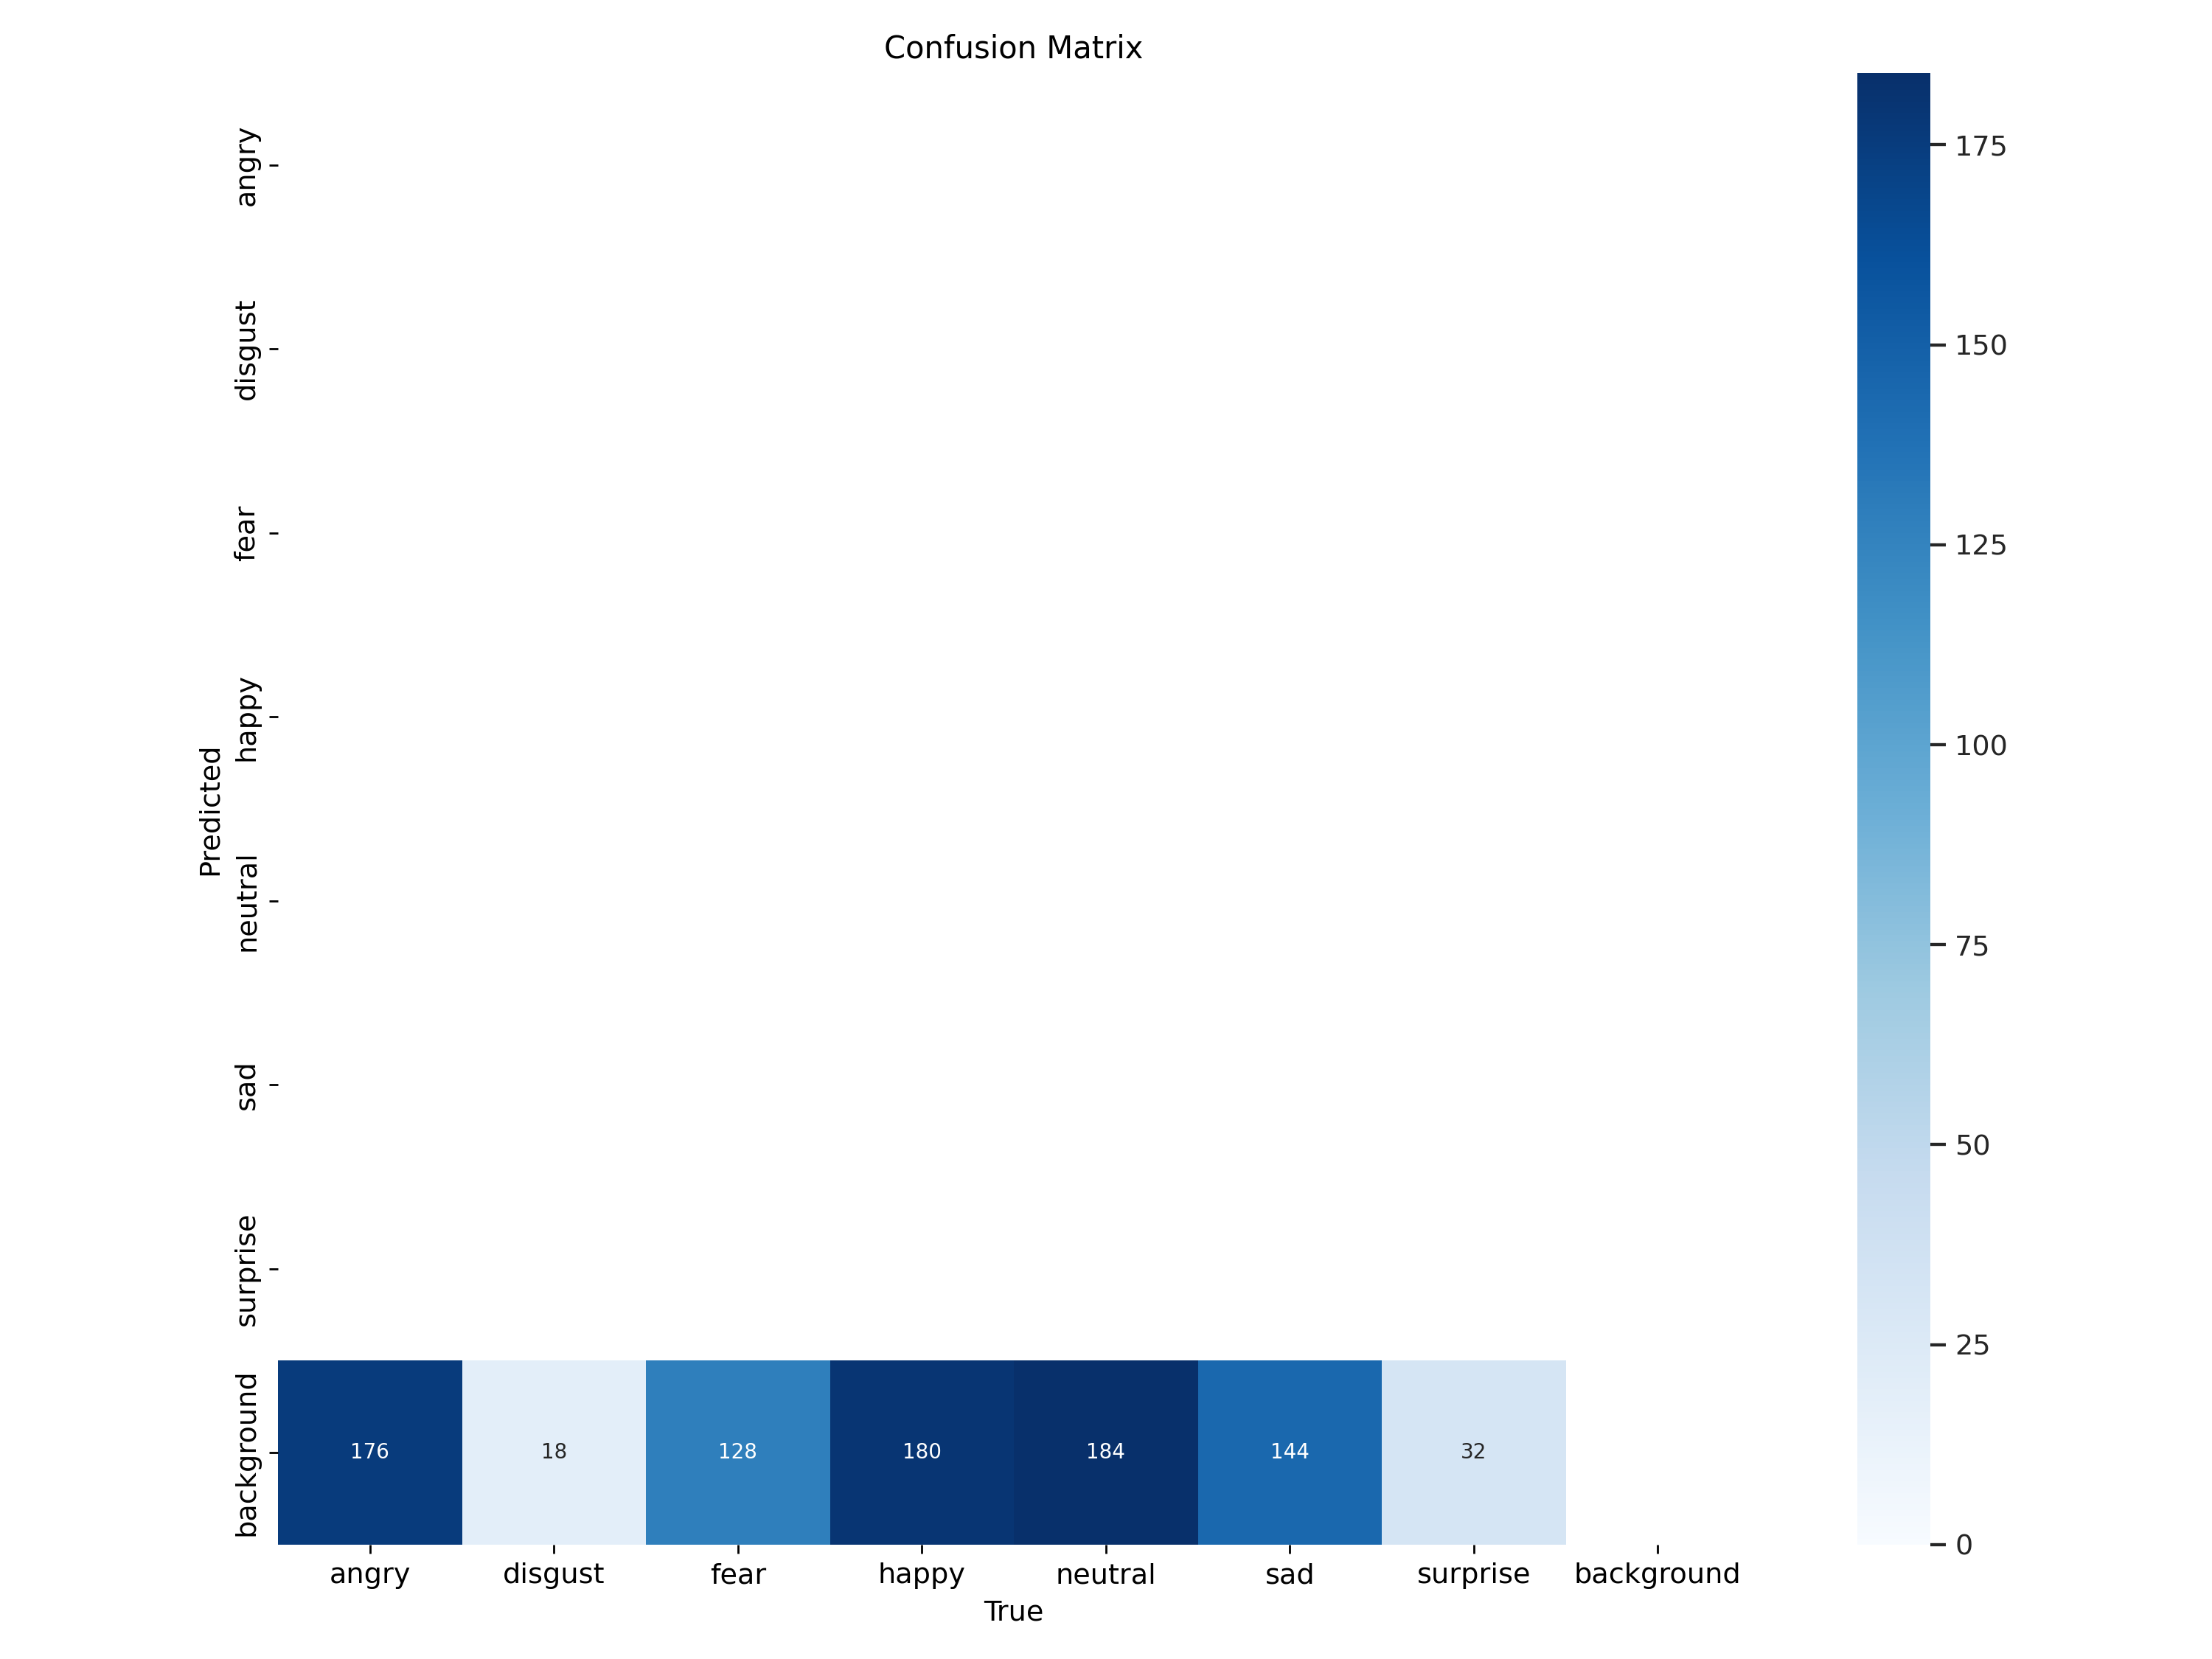

In [6]:
Image("./runs/detect/exp_name/confusion_matrix.png", width=800)

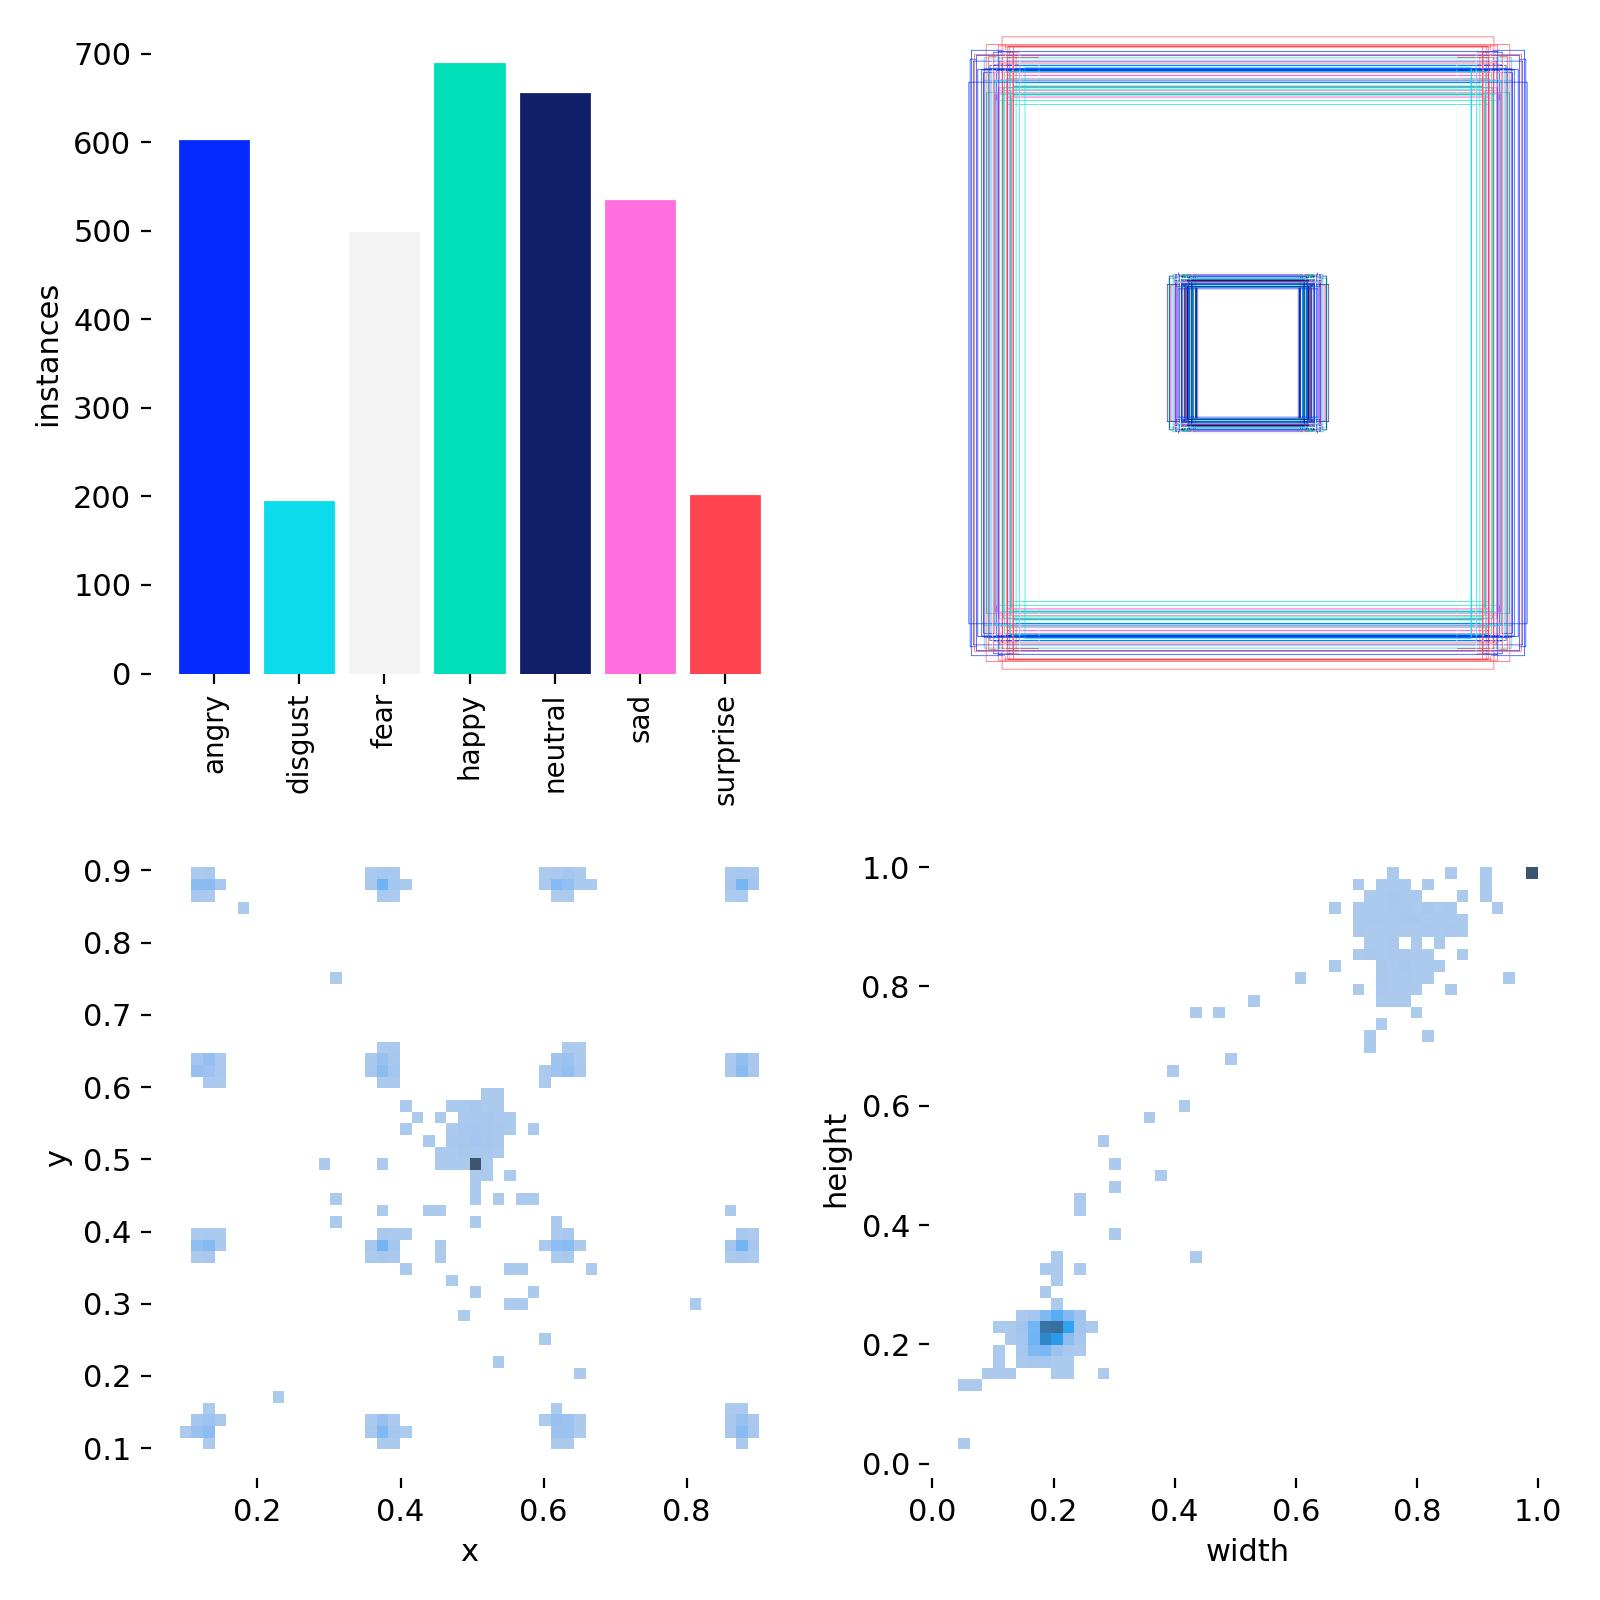

In [7]:
Image("./runs/detect/exp_name/labels.jpg", width=800)

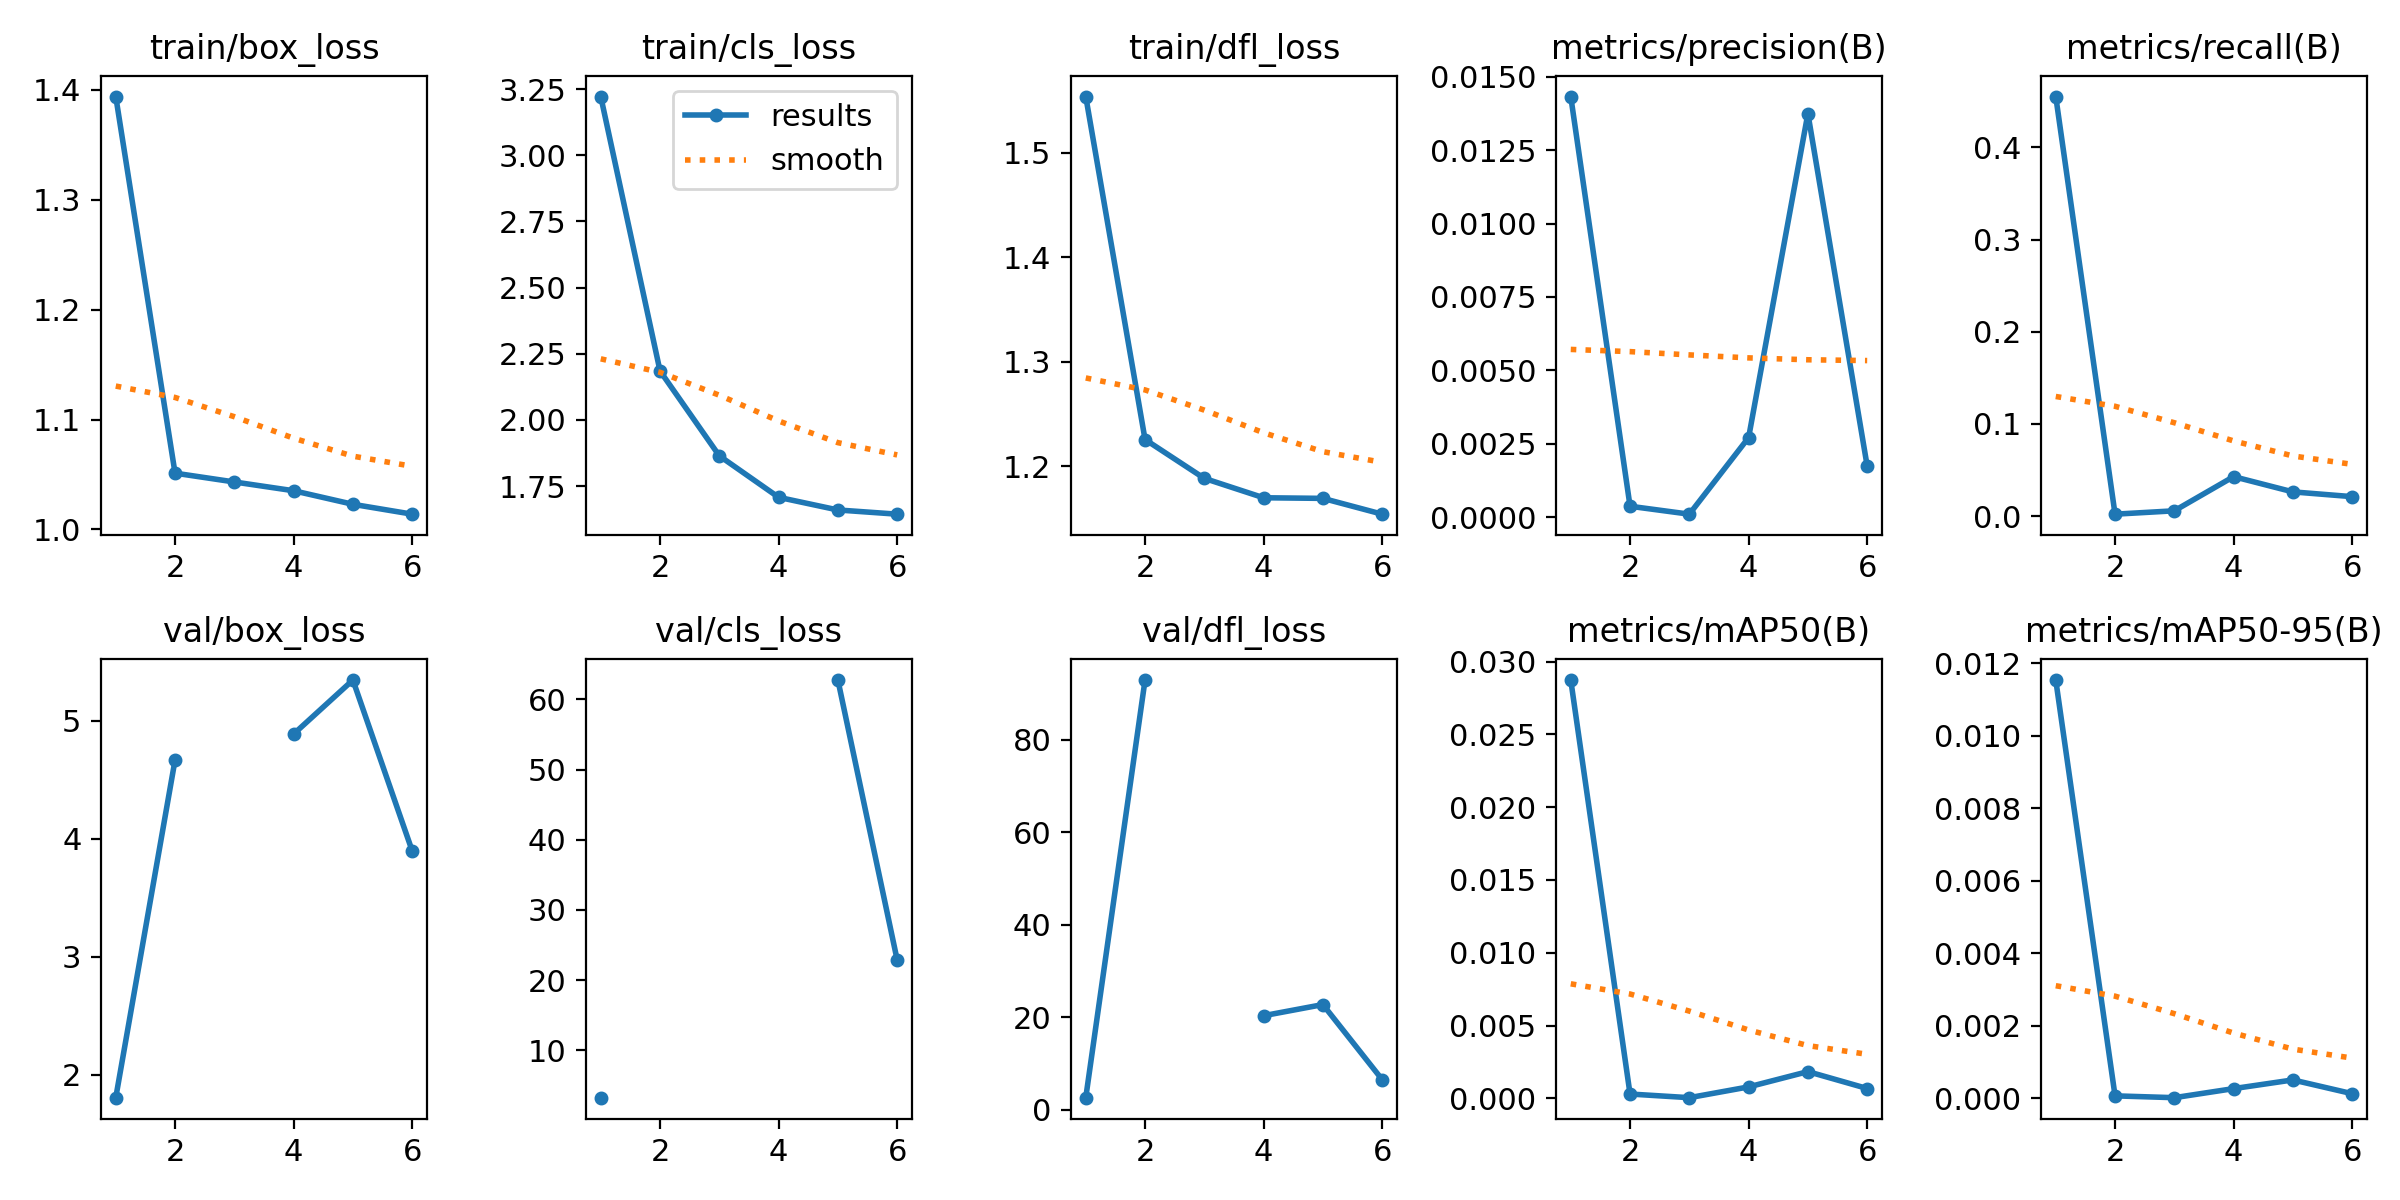

In [8]:
Image("./runs/detect/exp_name/results.png", width=600)

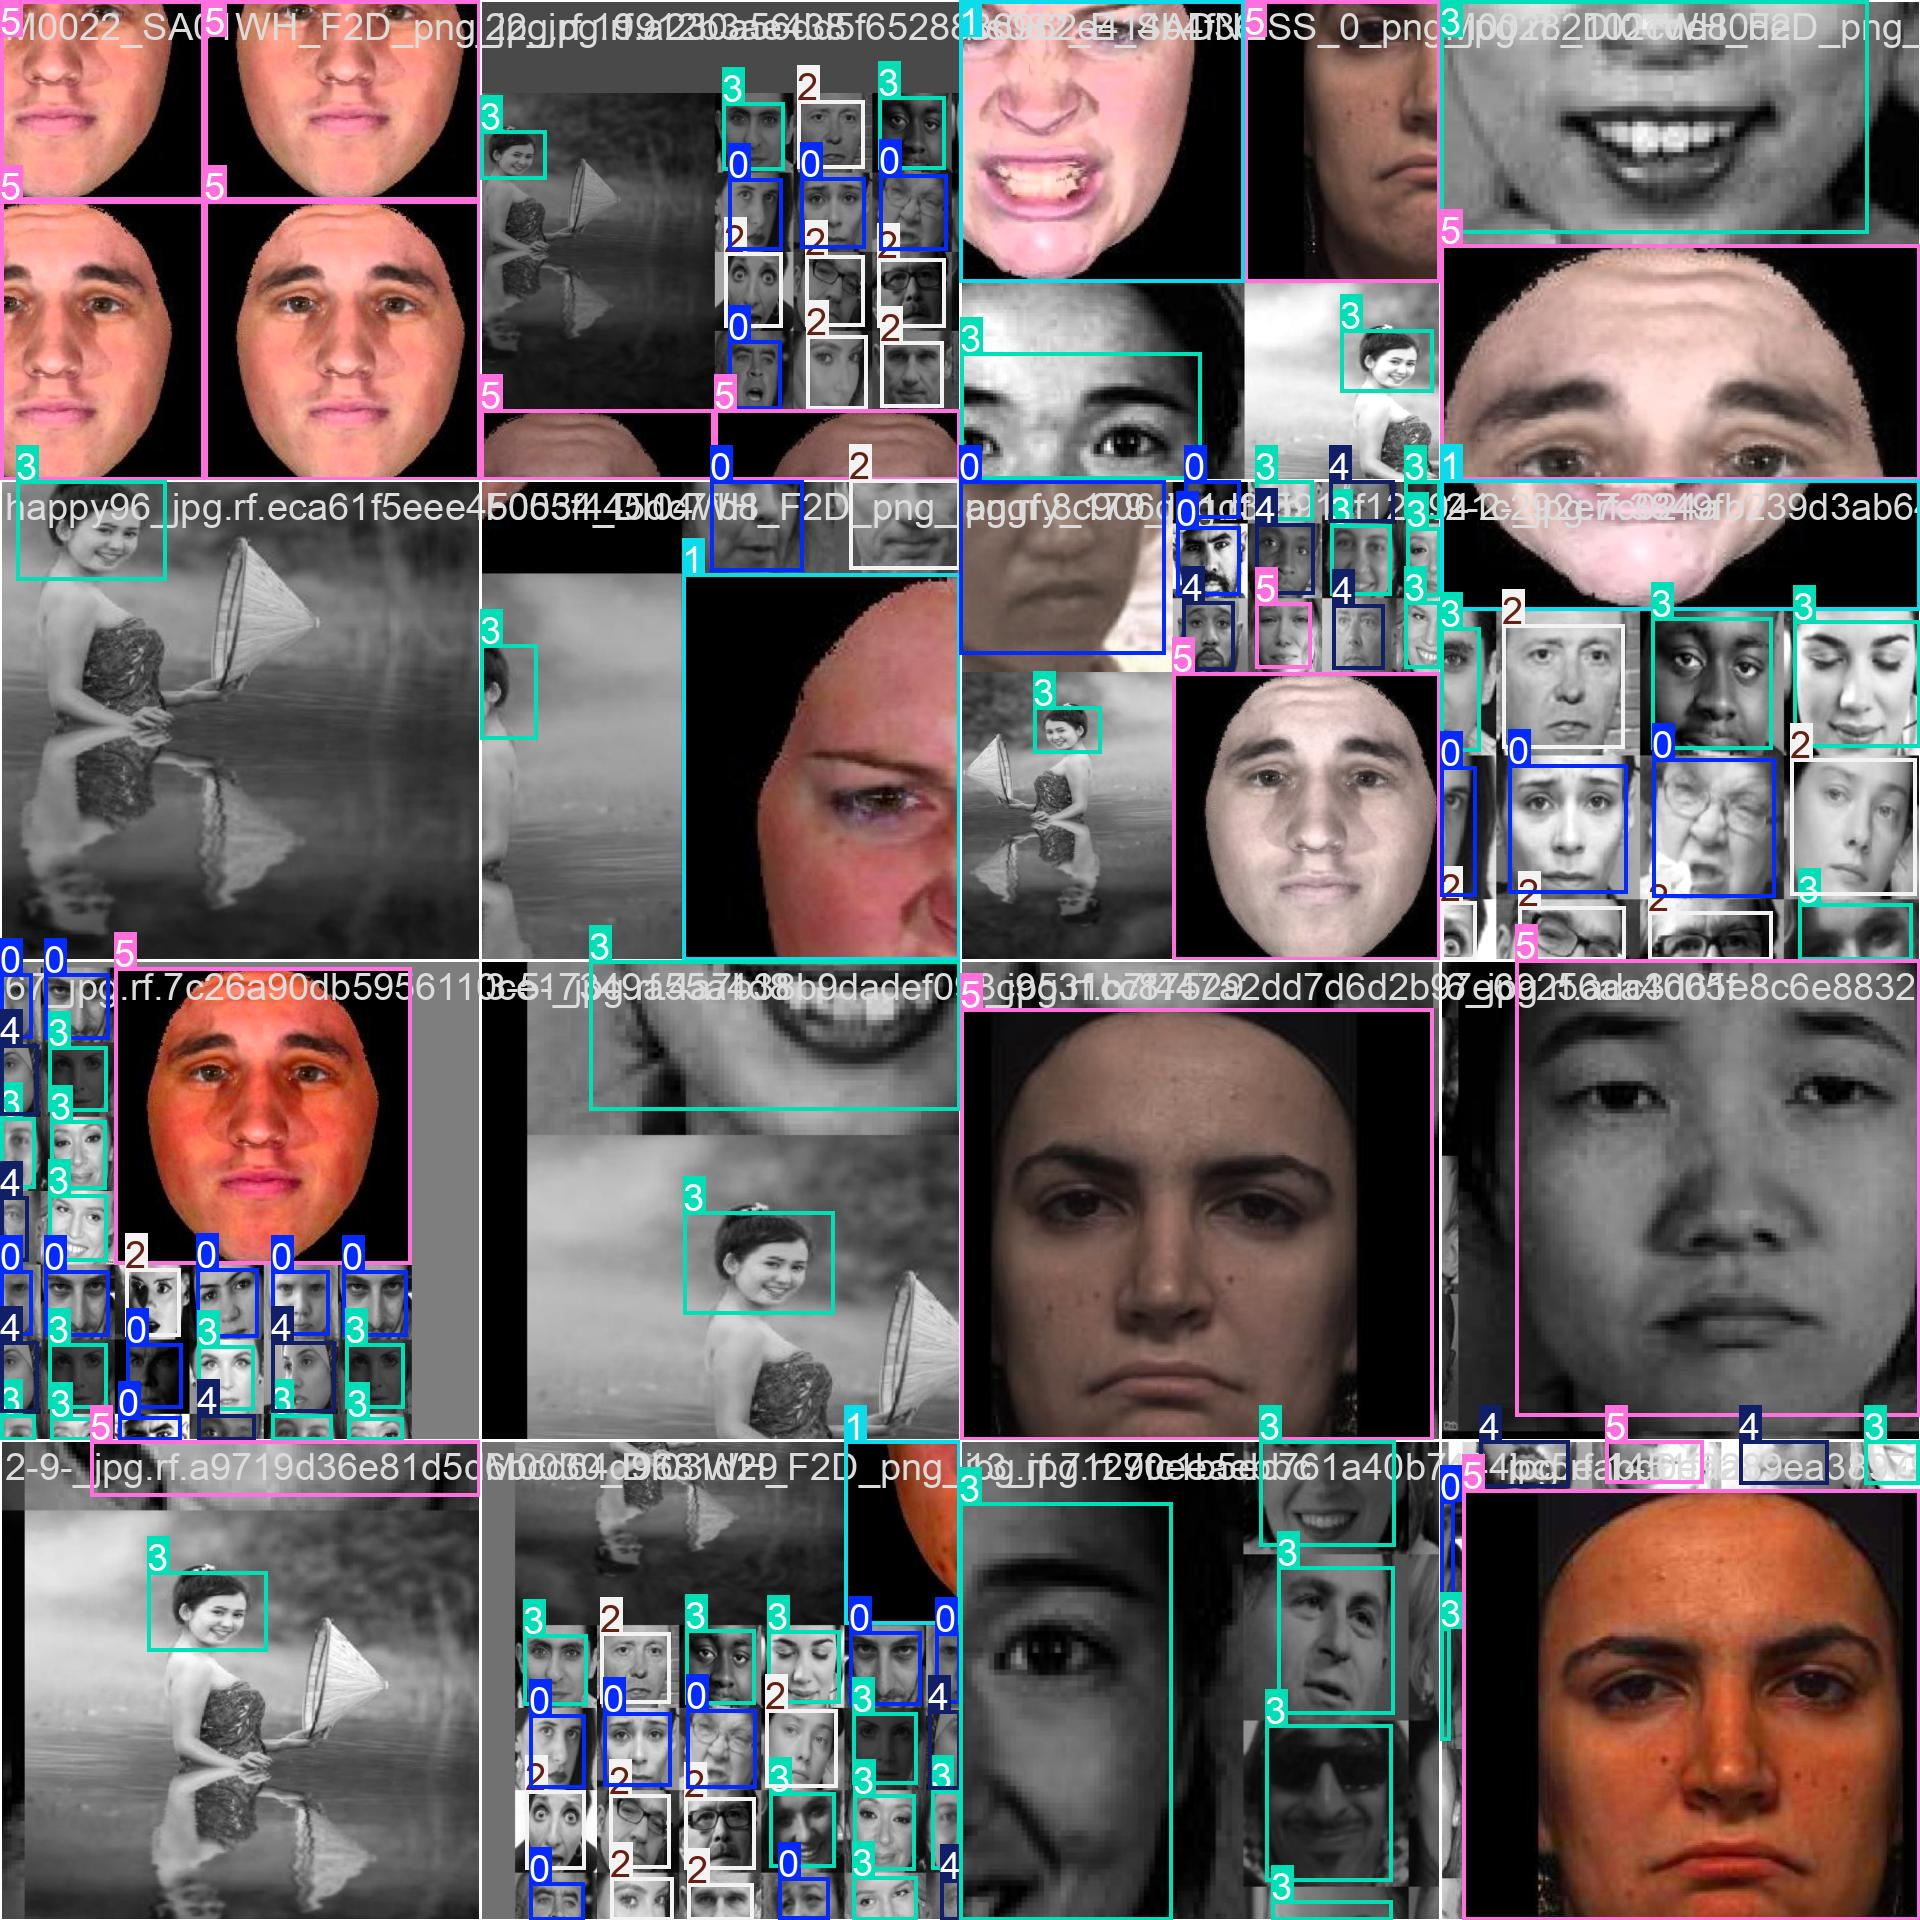

In [9]:
Image("./runs/detect/exp_name/train_batch0.jpg", width=600)

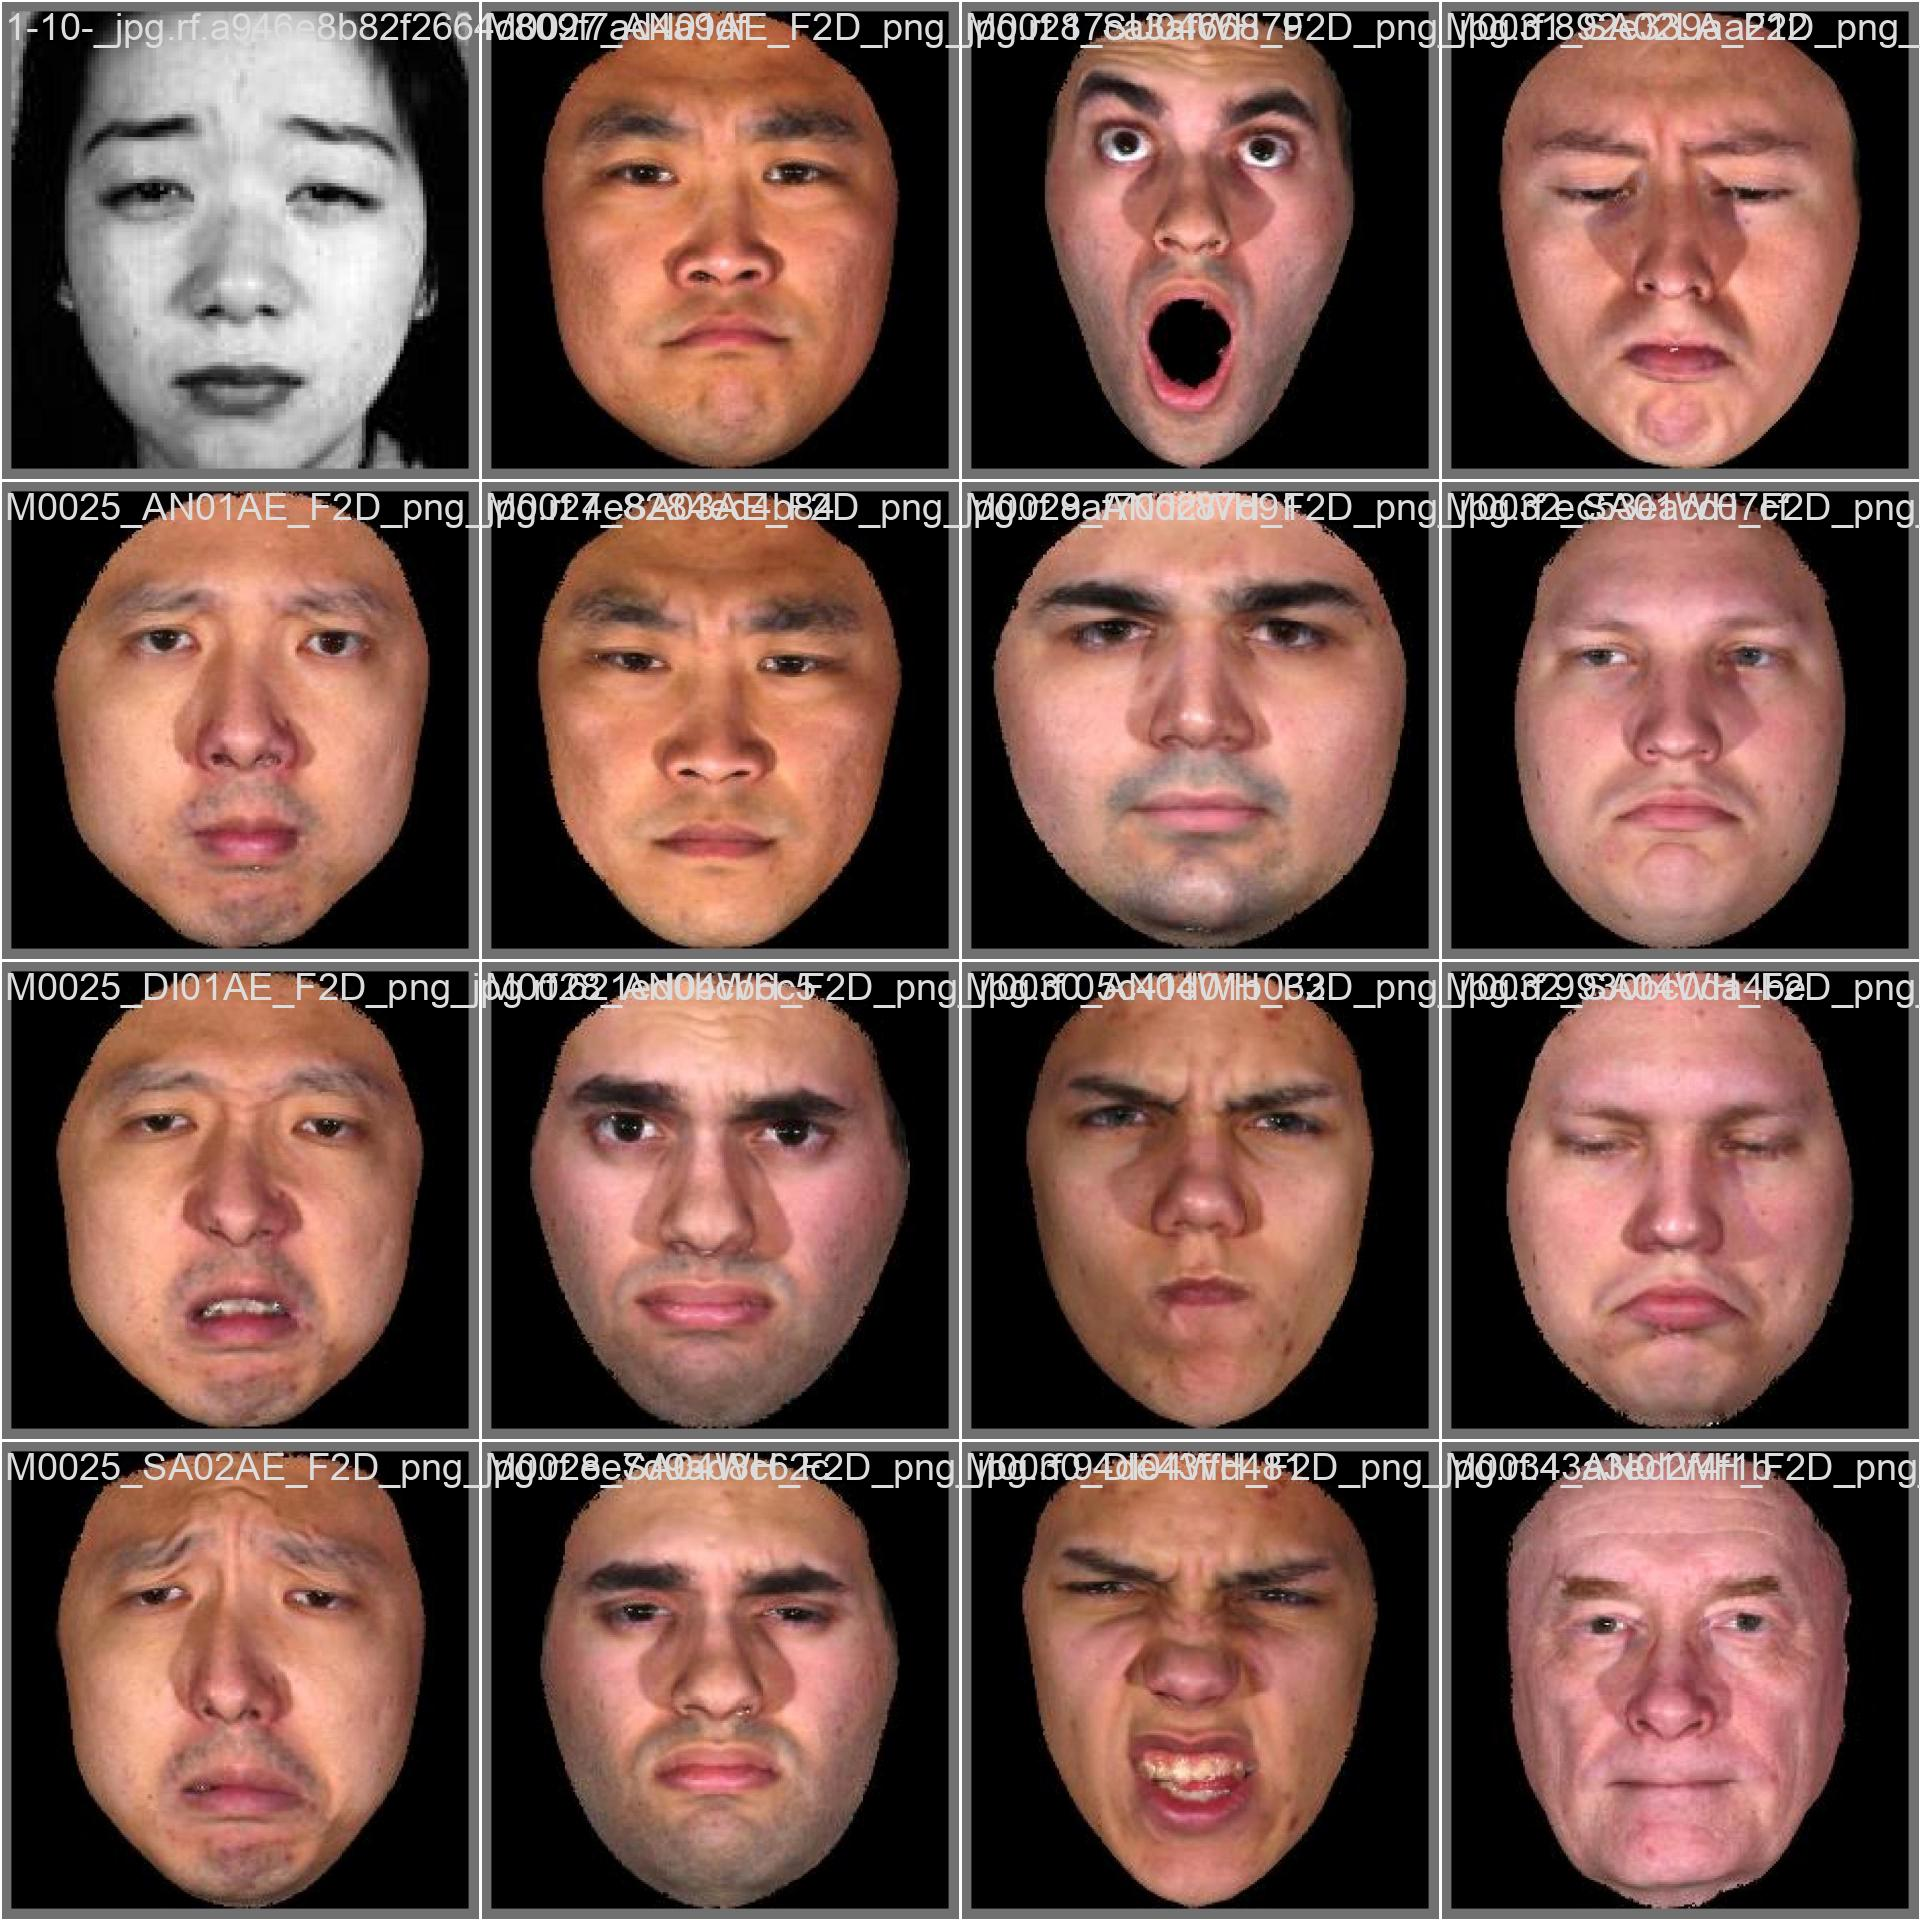

In [10]:
Image("./runs/detect/exp_name/val_batch0_pred.jpg", width=600)

**Step # 05  Validate Fine-Tuned Model**

In [11]:
# Perform validation
results = model.val(
    data=f"{dataset.location}/data.yaml",  # Path to the dataset YAML file
    batch=8,                  # Batch size for validation
    imgsz=640,                 # Image size for validation
    conf=0.001,                # Confidence threshold for predictions
    iou=0.6,                   # IoU threshold for NMS
    device=0,                  # Specify GPU (0) or CPU ('cpu')
    split="val"                # Split to validate on (default: 'val')
)



Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 15.00it/s]


                   all        185        862       0.66      0.727      0.731      0.615
                 angry         76        176      0.533      0.564      0.621      0.478
               disgust         18         18      0.736      0.944       0.88      0.875
                  fear         51        128      0.648       0.68      0.706       0.55
                 happy         64        180      0.773        0.8      0.834      0.622
               neutral         52        184      0.514      0.674      0.588       0.44
                   sad         64        144      0.478      0.521      0.545      0.411
              surprise         32         32      0.935      0.906      0.945      0.931
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/exp_name32


**Step # 06 Inference with Custom Model on Images**


image 1/1 /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


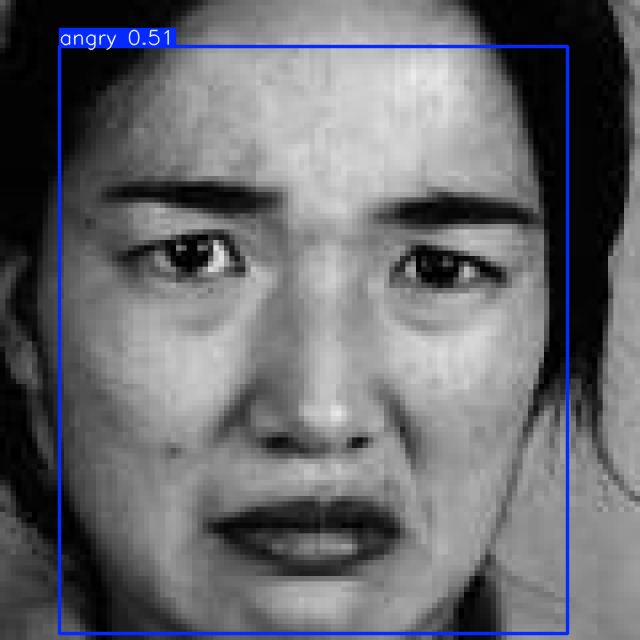

In [12]:
from ultralytics import YOLO
import cv2
import os
from IPython.display import Image, display



image_path = "./Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg"
# Perform object detection on an imageimport os

def find_images_in_subfolders(root_dir, image_extensions=None):
    """
    Find all image files in a directory and its subfolders.
    
    Args:
        root_dir (str): The root directory to search.
        image_extensions (list, optional): List of image file extensions to look for.
                                           Defaults to common image extensions.
    
    Returns:
        list: List of paths to image files.
    """
    if image_extensions is None:
        image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']
    
    image_files = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(subdir, file))
    return image_files

# Example usage
root_directory = './Facial-Emotion-Dataset--3/test/images'  # Replace with your directory path
image_list = find_images_in_subfolders(root_directory)



results = model(image_path, imgsz= 640)
results[0].show()
